<a href="https://colab.research.google.com/github/Hoanganhquy3107/Used-Car-Price-Analysis-and-Prediction/blob/main/ASM2_Bigdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import joblib

# Read the cleaned data
data = pd.read_csv('Cleaned_Car_Details_v3.csv')

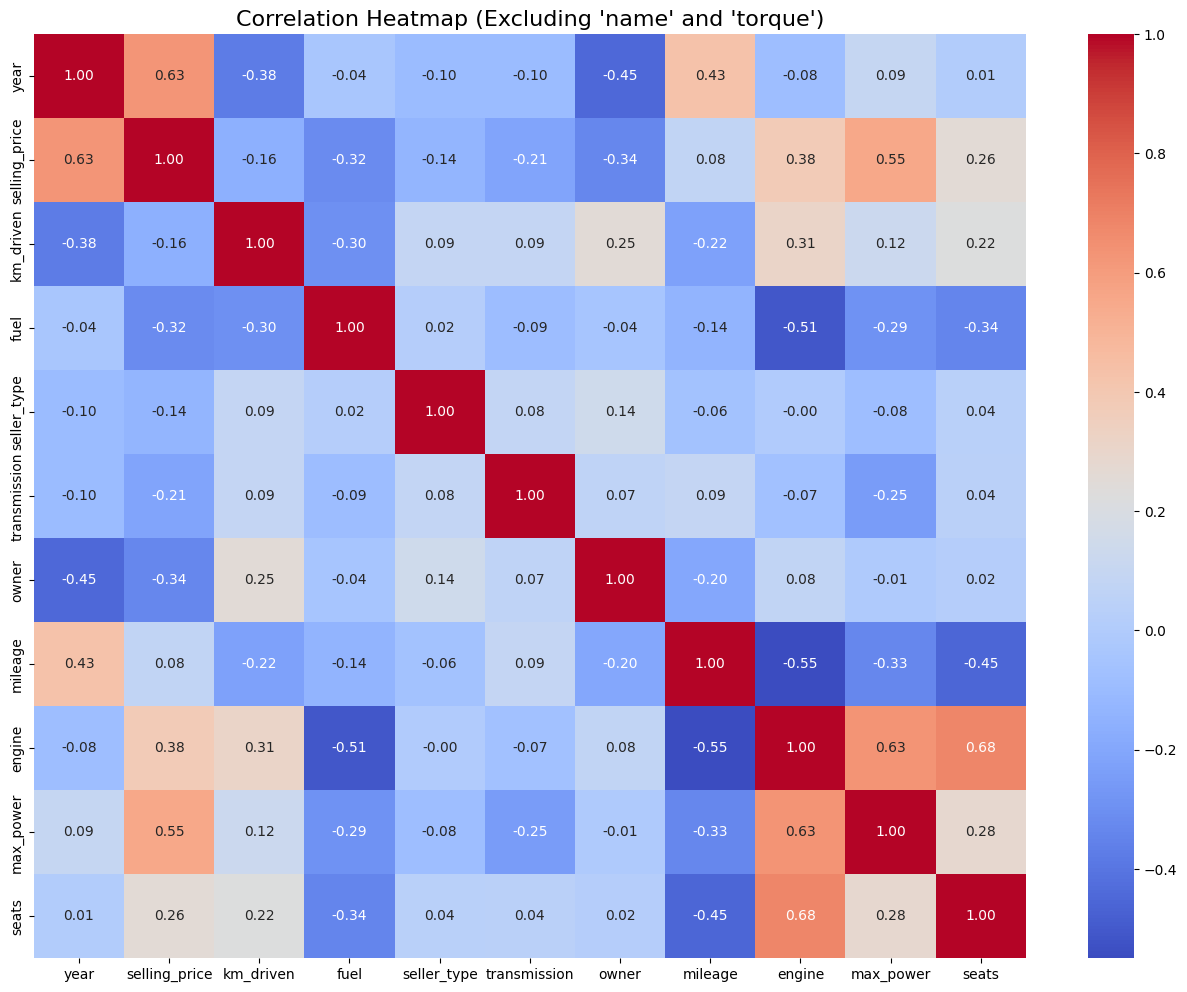

In [ ]:

# Remove 'name' and 'torque' for heatmap visualization
data_for_heatmap = data.drop(columns=['name', 'torque'])

# Apply Label Encoding to categorical features for heatmap
label_encoder = LabelEncoder()
categorical_columns = data_for_heatmap.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data_for_heatmap[column] = label_encoder.fit_transform(data_for_heatmap[column])

# Compute the correlation matrix
correlation_matrix = data_for_heatmap.corr()

# Plot heatmap to visualize feature relationships
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title("Correlation Heatmap (Excluding 'name' and 'torque')", fontsize=16)
plt.show()



In [ ]:
# Select features and target for model training
features = ['year', 'km_driven', 'mileage', 'seats', 'max_power', 'fuel', 'transmission']
data_cleaned = data.drop(columns=['name', 'torque'])  # Drop 'name' and 'torque' for training
X = data_cleaned[features]

# Apply Label Encoding to categorical features for training
for column in ['fuel', 'transmission']:
    X[column] = label_encoder.fit_transform(X[column])
print(X.head())

y = data_cleaned['selling_price']




   year  km_driven  mileage  seats  max_power  fuel  transmission
0  2014     145500    23.40    5.0      74.00     1             1
1  2014     120000    21.14    5.0     103.52     1             1
2  2006     140000    17.70    5.0      78.00     3             1
3  2010     127000    23.00    5.0      90.00     1             1
4  2007     120000    16.10    5.0      88.20     3             1


<ipython-input-3-82761fd9b430>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
<ipython-input-3-82761fd9b430>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Output sample prediction results
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(results.head())

# Save the model for future use
joblib.dump(model, 'car_price_prediction_model.pkl')
print("Model saved as 'car_price_prediction_model.pkl'")

Mean Squared Error (MSE): 7771783932.48
Root Mean Squared Error (RMSE): 88157.72
R-squared (R2): 0.88
   Actual      Predicted
0  350000  484859.720000
1  800000  773610.000000
2  346000  336359.990000
3  110000  209963.313333
4  475000  472563.303333
Model saved as 'car_price_prediction_model.pkl'


In [ ]:
# Load the saved model
model = joblib.load('car_price_prediction_model.pkl')

# Define the new car data
new_data = pd.DataFrame({
    'year': [2017],
    'km_driven': [150000],
    'mileage': [18],
    'seats': [5],
    'max_power': [70],
    'fuel': [3],
    'transmission': [1]
})
# Predict the selling price
predicted_price = model.predict(new_data)

# Display the result
print("New car information:")
print(new_data[['year', 'km_driven', 'mileage', 'seats']])
print(f"Predicted selling price: {predicted_price[0]:,.2f} INR")


New car information:
   year  km_driven  mileage  seats
0  2017     150000       18      5
Predicted selling price: 424,956.67 INR
